In [320]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [321]:
#Assignment week 8 (solve other clustering datasets from Kaggle or your own data set[score: 90])

#Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features.
#Drop other two features for simplicity.
#Figure out if any preprocessing such as scaling would help here
#Draw elbow plot and from that figure out optimal value of k

In [322]:
#load dataset
iris = load_iris()

In [323]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [324]:
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [325]:
#cleaning data
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)
df.head(60)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


In [326]:
#train kmeans clustering
km = KMeans(n_clusters=3,  init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_predict= km.fit_predict(df)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [327]:
df['cluster'] = y_predict
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [328]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [329]:
df.cluster.unique()

array([0, 2, 1])

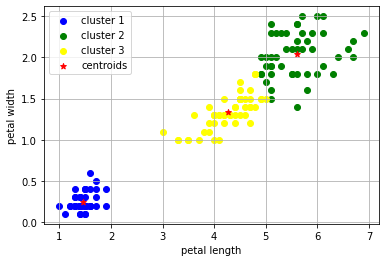

In [330]:
#plot the three clusters
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['petal length (cm)'],df1[],color='blue',label='cluster 1')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green',label='cluster 2')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow',label= 'cluster 3')

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],color = 'red', marker= '*', label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [331]:
# calculate distortion for a range of number of cluster
distortions= []
for k in range(1,11):
    km = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(df)
    distortions.append(km.inertia_)
print(distortions)

C:\Users\tiffa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[652.8686666666666, 112.3208, 31.371358974358973, 22.649637861231323, 14.190205868205869, 11.492874999999998, 9.298474003189792, 7.788416714864084, 6.868081395797187, 6.013259384475173]


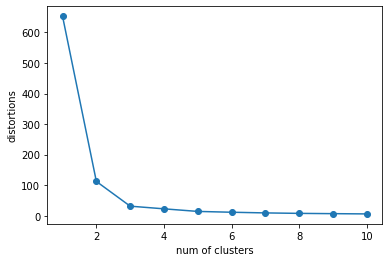

In [394]:
#Draw elbow plot and from that figure out optimal value of k plot
plt.xlabel('num of clusters')
plt.ylabel('distortions')
plt.plot(range(1,11), distortions, marker='o')

#the optimal value of k is 3.

In [406]:
#attempt code for exercise 1
#do the k means clustering with k= 3 and initial centroid:
#c1 (1,0)
#c2 (5,8)
#c3 (9,2)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random

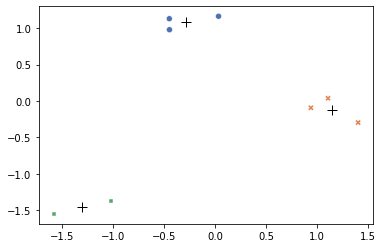

In [416]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KMeans:
    def __init__(self, n_clusters=3, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
    def fit(self, X_train):
        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]

        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
            
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs
    
# Create a dataset of 2D distributions
centers = 3
X_train, true_labels = make_blobs(n_samples=8, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
# Fit centroids to dataset
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)

# View results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         'k+',
         markersize=10,
         )
plt.show()

In [393]:
#Perform comparison with other clustering algorithms
#additional points +50

#clustering algorithm: Hierarchical agglomerative clustering
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()
print(df.shape) #(150,4)

(150, 4)


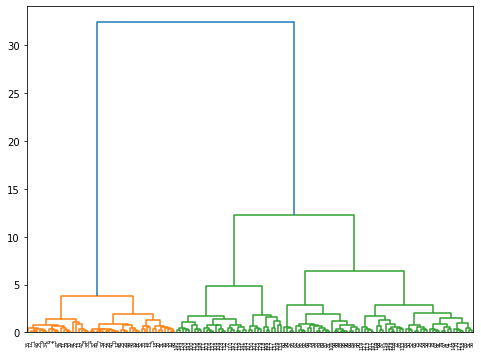

In [370]:
clusters = hierarchy.linkage(df, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(150, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(100, color='crimson'); 

In [383]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df)
labels = clustering_model.labels_

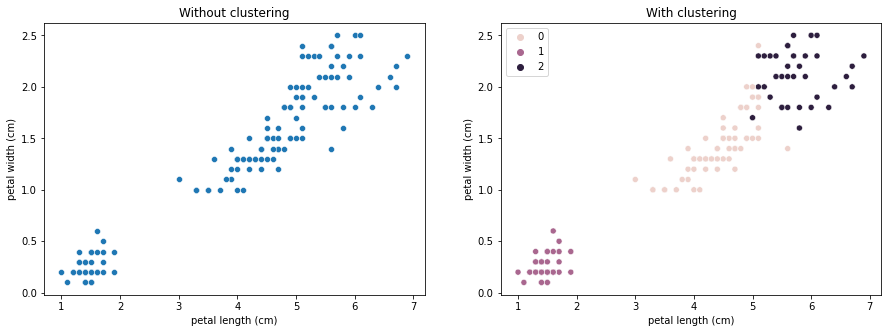

In [384]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='petal length (cm)', y='petal width (cm)').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='petal length (cm)', y='petal width (cm)', hue=clustering_model.labels_).set_title('With clustering');

In [385]:
clustering_model_no_clusters = AgglomerativeClustering(linkage="ward")
clustering_model_no_clusters.fit(df)
labels_no_clusters = clustering_model_no_clusters.labels_

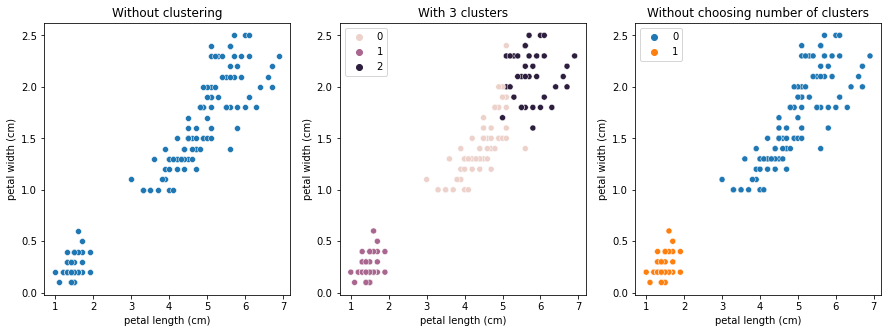

In [388]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='petal length (cm)', y='petal width (cm)').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='petal length (cm)', y='petal width (cm)', hue=clustering_model.labels_).set_title('With 3 clusters')
sns.scatterplot(ax=axes[2], data=df, x='petal length (cm)', y='petal width (cm)', hue=clustering_model_no_clusters.labels_).set_title('Without choosing number of clusters');

In [ ]:
#findings / comparison between K-Means and Hierarchical clustering

#Hierarchical clustering uses agglomerative or divisive techniques.
#also a method of cluster analysis which seeks to build a hierarchy of clusters without having fixed number of cluster. 
#Dendrograms can be used to visualize clusters in hierarchical clustering, helps with a better interpretation of results through meaningful taxonomies.
#No need to specify the number of clusters when making a dendrogram.
#one can stop at any number of clusters, one find appropriate by interpreting the dendrogram.
#useful for smaller datasets
#results are reproducible in Hierarchical clustering
#Agglomerative methods  begin with ‘n’ clusters and sequentially combine similar clusters until only one cluster is obtained.

#K Means uses a combination of centroid and euclidean distance to form clusters. 
#method of cluster analysis using a pre-specified no. of clusters which requires advance knowledge of 'K'(no. of clusters to divide data)
#Since one start with random choice of clusters, the results produced by running the algorithm many times may differ.
#Can use median or mean as a cluster centre to represent each cluster.


#conclusion
#It is easier to determine the number of clusters by hierarchical clustering’s dendrogram
#If there is a specific number of clusters in the dataset, but the group they belong to is unknown, choose K-means
#If the distinguishes are based on prior beliefs, hierarchical clustering should be used to know the number of clusters
#The result of K-means is unstructured, but that of hierarchal is more interpretable and informative
#With a large number of variables, K-means compute faster 

#source: https://www.geeksforgeeks.org/difference-between-k-means-and-hierarchical-clustering/#:~:text=k%2Dmeans%20is%20method%20of,having%20fixed%20number%20of%20cluster.